# Models: Part 1

Here we see how close we can predict a race outcome with just data from the Ergast API

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExajJ0cHhpdnV3NmhpcThscjJ6c3lmd2xvdTVibHluY3hxMDhzZ3lxdiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/SXxMF5CMWWKZUkBBgJ/giphy.gif")

## 1) Importing Packages and Data

In [2]:
import pandas as pd
import numpy as np
import F1_Preprocessing #Internal package to preprocess data
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1994)

In [3]:
#The data stored in this path is obtained from the API of https://ergast.com/mrd/. It is continuously updated.
#To update this data please run the file "1_API_Requests_Ergast.py"

path = 'C:/Users/gabri/Dropbox/Gaby/Proyectos/My_Portafolio/F1/Data/'

ResultsDF=pd.read_csv(path+"ResultsDF.csv")
QualifyingDF=pd.read_csv(path+"QualifyingDF.csv")
LapsDF=pd.read_csv(path+"LapsDF.csv")
PitsDF=pd.read_csv(path+"PitsDF.csv")

# Apply the data preprocessing for each df using a function stored in the repo. 
# This is done this way so the preprocessing is consistent throughout all notebooks.
ResultsDF=F1_Preprocessing.preprocess_F1results(ResultsDF)
LapsDF=F1_Preprocessing.preprocess_F1laps(LapsDF)
PitsDF=F1_Preprocessing.preprocess_F1pits(PitsDF)

C:\Users\gabri\AppData\Local\Temp\ipykernel_34808\3019755211.py:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  LapsDF=pd.read_csv(path+"LapsDF.csv")


## 2) Data Preprocessing

In [9]:
# Merging features between dfs

# Laps and Pits
Laps_Pits=LapsDF.merge(PitsDF[["season","round","driverid","pit_stop_lap_number","pit_stop_time","pit_stop_duration_in_milliseconds","pit_stop_number"]].drop_duplicates(),
                   left_on=["driverid","season","round","current_lap_number"],
                   right_on=["driverid","season","round","pit_stop_lap_number"],how="left")


# We only have information of the pit stops from 2012, so Laps_Pits will have instances from 2012 or later
Laps_Pits=Laps_Pits[Laps_Pits["season"]>=2012].drop_duplicates()


# Merging with Results df
SelectedResults=ResultsDF[['final_position', 'final_points', 'final_grid', 'final_laps', 'final_status', 'driverid','driver.nationality', 'constructor.constructorid', 'constructor.nationality','driver.dateofbirth', 'race_time.millis','fastestlap.rank', 'fastestlap.lap', 'fastestlap.averagespeed.units','fastestlap.averagespeed.speed', 'season', 'round','fastestlap.time.in_milliseconds', 'season-round','circuit.circuitid_encoded', 'constructor.constructorid_encoded','driverid_encoded','driver.age_at_race']].drop_duplicates()

Laps_Pits_Results=pd.merge(Laps_Pits,SelectedResults,on=["driverid","season","round"],how="left")

## 2) Correlation of features

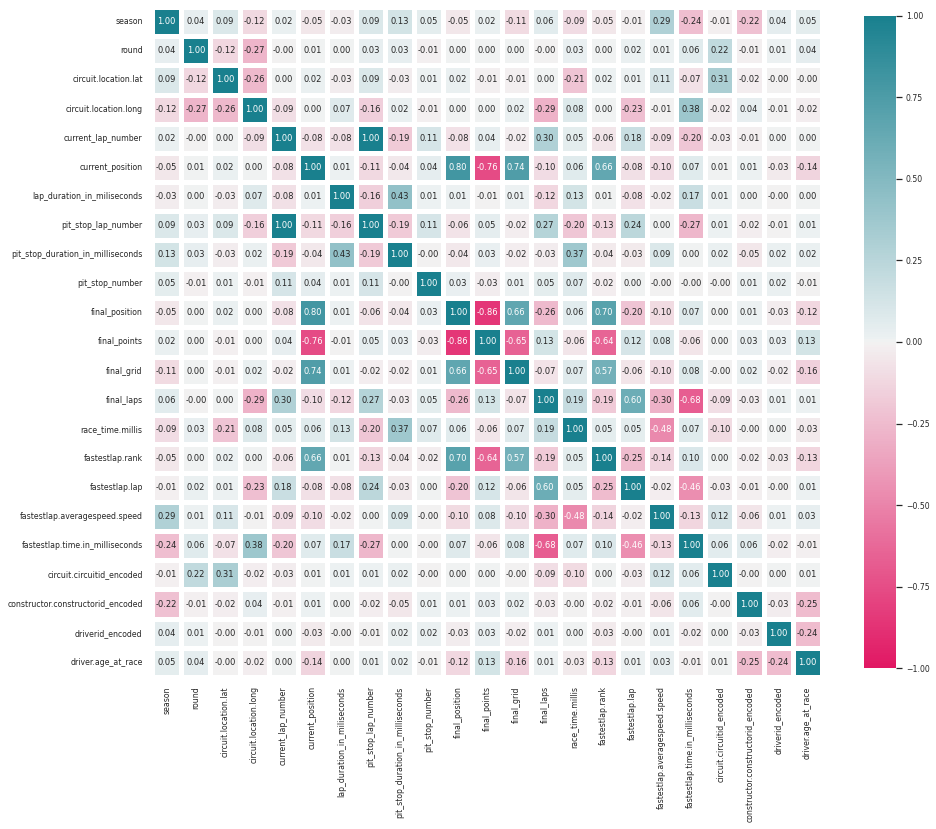

In [12]:
#Calculating correlation: Heatmap
sns.set_theme(style="whitegrid", palette="magma",font_scale=0.7,font="DejaVu Sans")
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(0, 210, 95, 49, as_cmap=True)
sns.heatmap(Laps_Pits_Results.corr(), annot=True, fmt=".2f", 
           linewidths=5,cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

plt.show()